In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-steam-games/steamspy_data.csv
/kaggle/input/top-1000-steam-games/steam_app_data.csv


In [22]:
# Load the CSV files
steamspy_data = pd.read_csv('/kaggle/input/top-1000-steam-games/steamspy_data.csv')
steam_app_data = pd.read_csv('/kaggle/input/top-1000-steam-games/steam_app_data.csv')

# Preview the data from steam_app_data.csv
steam_app_data.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 137378},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 5474},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 3694},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 1924},NaN,"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 15478},NaN,"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"


In [23]:
#Let's take a look to the shape of the data
steam_app_data.shape

(1000, 39)

In [24]:
# Preview the data from steamspy_data.csv
steamspy_data.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,216345,5530,0,"10,000,000 .. 20,000,000",0,0,0,0,999,999,0,"English, French, German, Italian, Spanish - Sp...",Action,10775,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,6472,990,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,77,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272..."
2,30,Day of Defeat,Valve,Valve,NaN,5686,634,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Spain",Action,89,"{'FPS': 794, 'World War II': 261, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,2242,490,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,8,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,17468,890,0,"2,000,000 .. 5,000,000",0,0,0,0,499,499,0,"English, French, German, Korean",Action,162,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S..."


In [25]:
#Let's take a look to the shape of the data
steamspy_data.shape

(1000, 20)

In [26]:
#Check for missing values
missing_values_steam_app=steam_app_data.isnull().sum()
missing_values_steamspy=steamspy_data.isnull().sum()

missing_values_steam_app, missing_values_steamspy

(type                          6
 name                          0
 steam_appid                   0
 required_age                  6
 is_free                       6
 controller_support          593
 dlc                         443
 detailed_description          6
 about_the_game                6
 short_description             6
 fullgame                   1000
 supported_languages           6
 header_image                  6
 website                     126
 pc_requirements               6
 mac_requirements              6
 linux_requirements            6
 legal_notice                275
 drm_notice                  929
 ext_user_account_notice     889
 developers                    7
 publishers                    6
 demos                       892
 price_overview              279
 packages                    206
 package_groups                6
 platforms                     6
 metacritic                  414
 reviews                     628
 categories                    8
 genres   

In [27]:
#Check for duplicates
duplicates_steam_app=steam_app_data.duplicated().sum()
duplicates_steamspy=steamspy_data.duplicated().sum()

duplicates_steam_app, duplicates_steamspy

(1, 0)

In [28]:
#Remove duplicates from steam_app_data 
steam_app_data=steam_app_data.drop_duplicates()

#Check again for duplicates
duplicates_steam_app=steam_app_data.duplicated().sum()
duplicates_steam_app

0

In [29]:
#Qualitative missing values filling up with "unknown" tag
qualitative_columns=['type','controller_support','dlc','website','legal_notice','drm_notice','ext_user_account_notice','demos','price_overview','packages','categories','genres','screenshots','movies','recommendations']
steam_app_data[qualitative_columns]=steam_app_data[qualitative_columns].fillna('Unknown')

#Check for the missing values again
missing_values_steam_app=steam_app_data.isnull().sum()
missing_values_steam_app

type                         0
name                         0
steam_appid                  0
required_age                 6
is_free                      6
controller_support           0
dlc                          0
detailed_description         6
about_the_game               6
short_description            6
fullgame                   999
supported_languages          6
header_image                 6
website                      0
pc_requirements              6
mac_requirements             6
linux_requirements           6
legal_notice                 0
drm_notice                   0
ext_user_account_notice      0
developers                   7
publishers                   6
demos                        0
price_overview               0
packages                     0
package_groups               6
platforms                    6
metacritic                 414
reviews                    627
categories                   0
genres                       0
screenshots                  0
movies  

In [30]:
#Quantitative missing values filling up with "0"
quantitative_columns=['metacritic','reviews','achievements']

steam_app_data[quantitative_columns]=steam_app_data[quantitative_columns].fillna(0)

missing_values_steam_app=steam_app_data.isnull().sum()

missing_values_steam_app

type                         0
name                         0
steam_appid                  0
required_age                 6
is_free                      6
controller_support           0
dlc                          0
detailed_description         6
about_the_game               6
short_description            6
fullgame                   999
supported_languages          6
header_image                 6
website                      0
pc_requirements              6
mac_requirements             6
linux_requirements           6
legal_notice                 0
drm_notice                   0
ext_user_account_notice      0
developers                   7
publishers                   6
demos                        0
price_overview               0
packages                     0
package_groups               6
platforms                    6
metacritic                   0
reviews                      0
categories                   0
genres                       0
screenshots                  0
movies  

In [31]:
#Statistics for steamspy_data
steamspy_data.describe(include=[np.number])

,appid,score_rank,positive,negative,userscore,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
count,1.000000e+03,0.0,1.000000e+03,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.0000,1.000000e+03
mean,4.756415e+05,NaN,7.109154e+04,10722.915000,0.0,0.0,0.0,0.0,0.0,1487.210000,1781.661000,10.2550,6.262127e+03
std,4.304935e+05,NaN,2.453947e+05,44979.287885,0.0,0.0,0.0,0.0,0.0,1554.987365,1694.741439,25.5569,4.211502e+04
min,1.000000e+01,NaN,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000,0.000000e+00
25%,2.121375e+05,NaN,1.145750e+04,1663.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000,8.675000e+01
50%,3.325100e+05,NaN,2.600050e+04,3347.000000,0.0,0.0,0.0,0.0,0.0,999.000000,1499.000000,0.0000,4.590000e+02
75%,6.446525e+05,NaN,6.161475e+04,7280.500000,0.0,0.0,0.0,0.0,0.0,1999.000000,2999.000000,0.0000,2.033500e+03
max,2.050650e+06,NaN,6.547618e+06,939005.000000,0.0,0.0,0.0,0.0,0.0,6999.000000,8499.000000,90.0000,1.088407e+06


In [34]:
#Statistics for steam_app_data
steam_app_data[['steam_appid', 'required_age']].describe()

,steam_appid,required_age
count,9.990000e+02,993.000000
mean,4.740564e+05,2.377644
std,4.307718e+05,5.671926
min,1.000000e+01,0.000000
25%,2.119450e+05,0.000000
50%,3.314700e+05,0.000000
75%,6.414050e+05,0.000000
max,2.050650e+06,18.000000


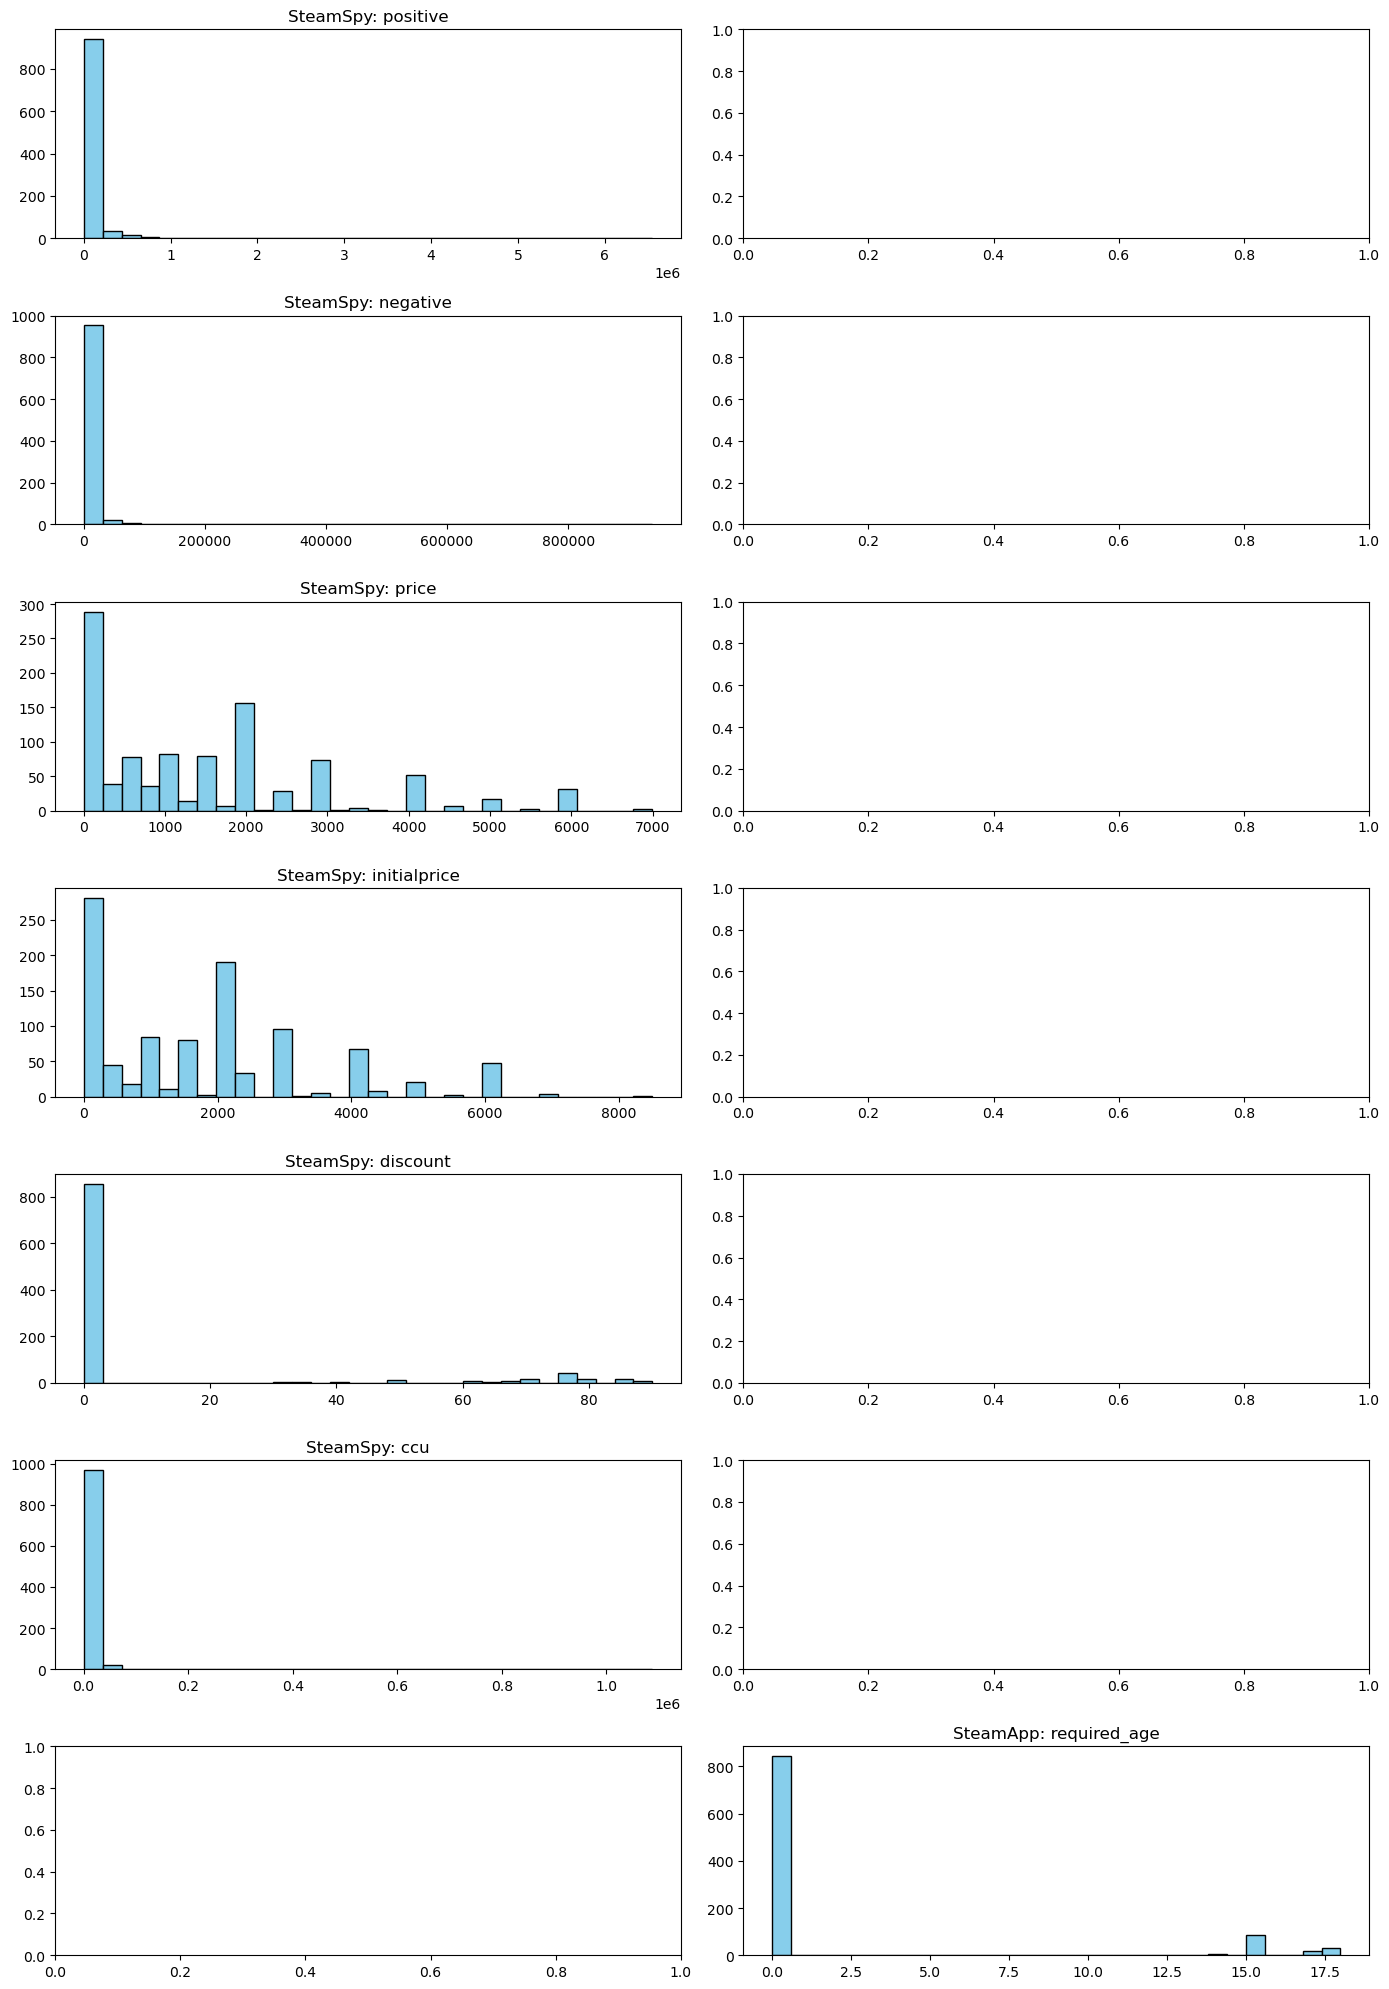

In [35]:
import matplotlib.pyplot as plt
#Columns to put on histograms
columns=['positive', 'negative', 'price','initialprice', 'discount', 'ccu', 'required_age']
fig,axs=plt.subplots(len(columns), 2, figsize=(14, 20))
for i, column in enumerate(columns):
    if column in steamspy_data.columns:
        axs[i, 0].hist(steamspy_data[column], bins=30, color='skyblue', edgecolor='black')
        axs[i, 0].set_title(f'SteamSpy: {column}')
    
    if column in steam_app_data.columns:
        axs[i, 1].hist(steam_app_data[column], bins=30, color='skyblue', edgecolor='black')
        axs[i, 1].set_title(f'SteamApp: {column}')

plt.tight_layout()
plt.show()